<h2 style="font-weight: 700; text-align: center">Image Segmentation - First Derivative Edge Detection</h2>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Import subject image

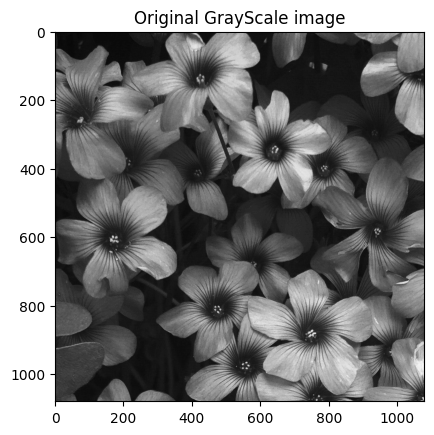

In [2]:
img = cv.imread("../Sample Images/Oxalis.jpg")
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgg = imgg[:1080, :1080]
plt.title("Original GrayScale image")
plt.imshow(imgg, cmap="gray")
plt.show()

###### This image has both horizontal and vertical edges in almost equal propotions as the centre of the flowers are circular.

#### Utility Function - Matplotting the output(s)

In [3]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(25, 40))
  fig.set_dpi(150)
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])
  plt.show()

#### Image - Mask Convolution function

In [4]:
def convolute_image_33(img, mask):
  mask = np.array(mask)
  conv_img = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]
  for x in range(1, img.shape[0] - 1):
    for y in range(1, img.shape[1] - 1):
      convoluted = img[x - 1: x + 2, y - 1: y + 2] * mask
      val = sum(map(sum, convoluted))
      if val > 0:
        conv_img[x][y] = val if val <= 255 else 255
      else:
        conv_img[x][y] = 0
  return np.array(conv_img)

### Callers

#### Prewitts Filter

Prewitts X-Gradient Mask
[-1, -1, -1]
[0, 0, 0]
[1, 1, 1]

Prewitts Y-Gradient Mask
[-1, 0, 1]
[-1, 0, 1]
[-1, 0, 1]


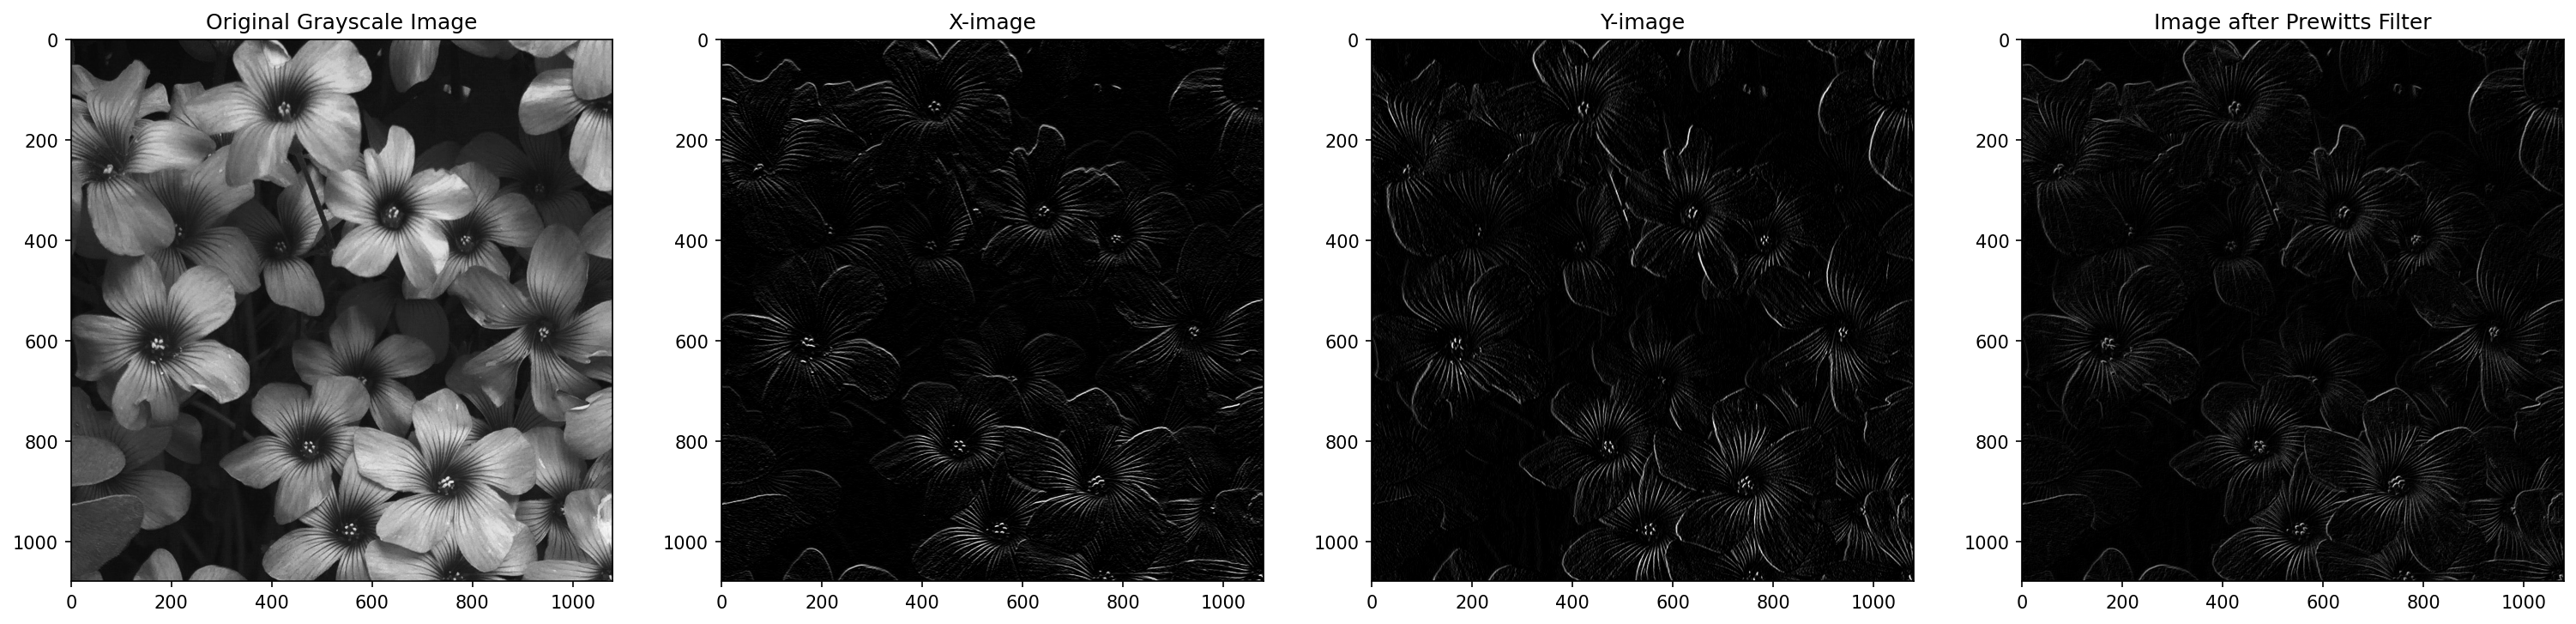

In [5]:
prewitts_x_mask = [[x - 1 for _ in range(3)] for x in range(3)]
print("Prewitts X-Gradient Mask", end="\n")
print(*prewitts_x_mask, sep="\n")
prewitts_y_mask = [[y - 1 for y in range(3)] for _ in range(3)]
print("\nPrewitts Y-Gradient Mask", end="\n")
print(*prewitts_y_mask, sep="\n")

x_gradient_image = convolute_image_33(imgg, prewitts_x_mask)
y_gradient_image = convolute_image_33(imgg, prewitts_y_mask)
final_image = x_gradient_image + y_gradient_image

matplot_images(imgg, x_gradient_image, y_gradient_image, final_image, titles=["Original Grayscale Image", "X-image", "Y-image", "Image after Prewitts Filter"])

#### Sobel Filter

Sobel X-Gradient Mask
[-1, -2, -1]
[0, 0, 0]
[1, 2, 1]

Sobel Y-Gradient Mask
[-1, 0, 1]
[-2, 0, 2]
[-1, 0, 1]


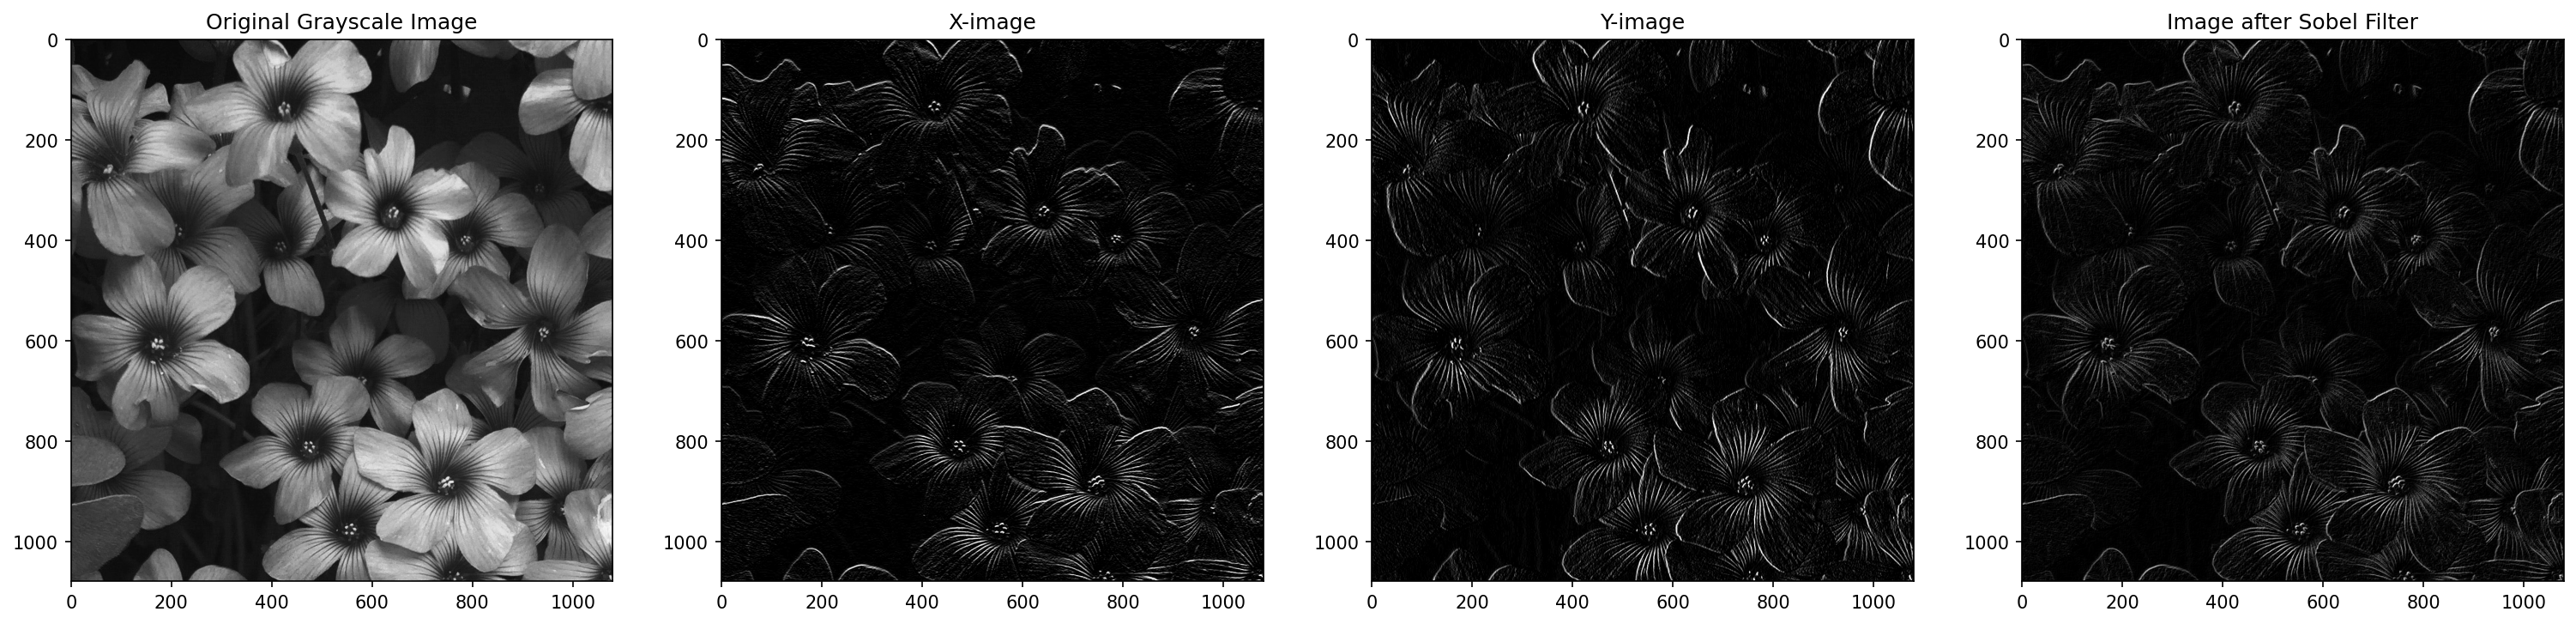

In [6]:
sobel_x_mask = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
print("Sobel X-Gradient Mask", end= "\n")
print(*sobel_x_mask, sep="\n")
sobel_y_mask = np.array(sobel_x_mask).T.tolist()    # transpose
print("\nSobel Y-Gradient Mask", end= "\n")
print(*sobel_y_mask, sep="\n")

x_gradient_image = convolute_image_33(imgg, sobel_x_mask)
y_gradient_image = convolute_image_33(imgg, sobel_y_mask)

final_image = x_gradient_image + y_gradient_image
matplot_images(imgg, x_gradient_image, y_gradient_image, final_image, titles=["Original Grayscale Image", "X-image", "Y-image", "Image after Sobel Filter"])

#### Conclusion

- As it can be seen, using the separate filters (in both Prewitts and Sobel) gives results in the respective axes i.e, Fx gives edges in the X-axis and Fy gives edges in Y-axis.
- This can be particularly useful when we want edges only in one direction for any analysis.
- For this image, Sobel Filter has highlighted the edges (high frequency zones) more than the Prewitts Filter, albeit being a bit more noisy.